In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

## Useful plot representing correlation, like scatter plot, Correlogram, piecewise plot

## 1. Scatter plot, most frequently used one

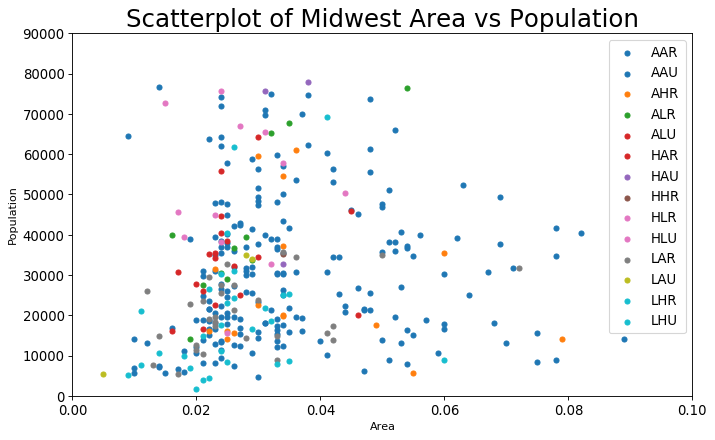

In [2]:
# Import dataset 
midwest = pd.read_csv("data/midwest_filter.csv")

# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')

# Core part, scatter plot from matplotlib
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show() 

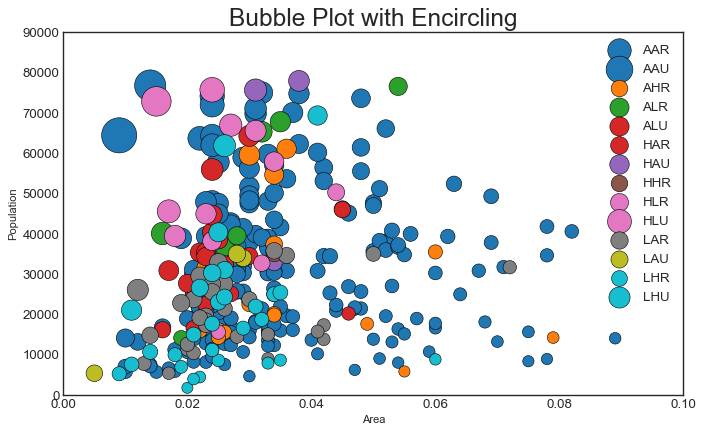

In [3]:
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("data/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=colors[i], label=str(category), edgecolors='black', linewidths=.5)

plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show() 

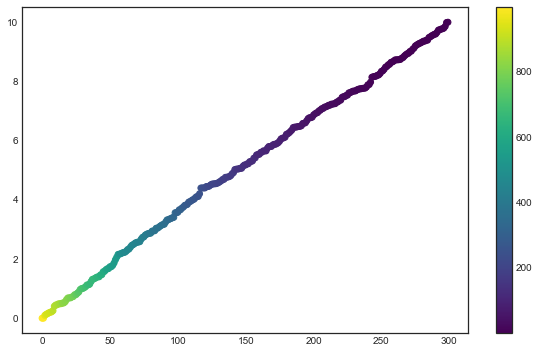

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import random

# We have three dimensions of data. x and y will be plotted on the x and y axis, while z will 
# be represented with color.
# If z is a numpy array, matplotlib refuses to plot this.
x = list(range(300))
y = sorted([random.random()*10 for i in range(300)])
z = list(reversed([i**3 for i in y]))

# cmap will generate a tuple of RGBA values for a given number in the range 0.0 to 1.0 
# (also 0 to 255 - not used in this example).
# To map our z values cleanly to this range, we create a Normalize object.
cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
colors = [cmap(normalize(value)) for value in z]

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x, y, color=colors)

# Optionally add a colorbar
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)

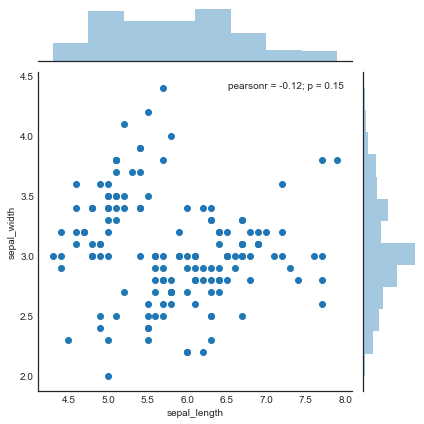

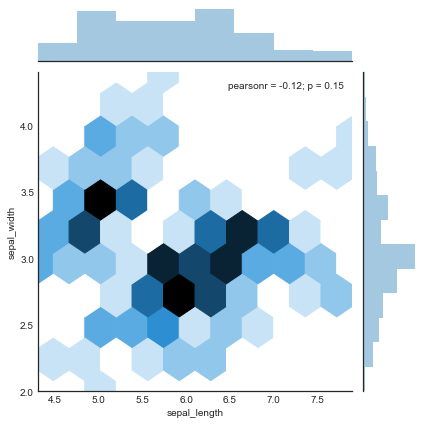

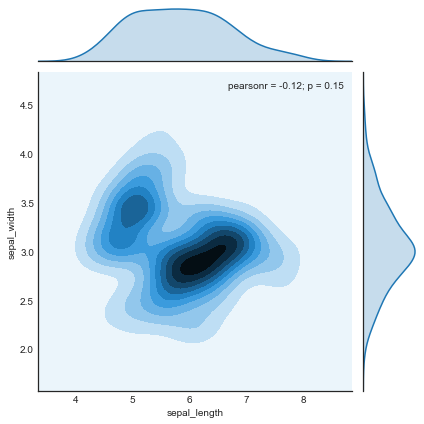

In [5]:
import seaborn as sns
df = sns.load_dataset('iris')
 
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter')
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='hex')
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde')


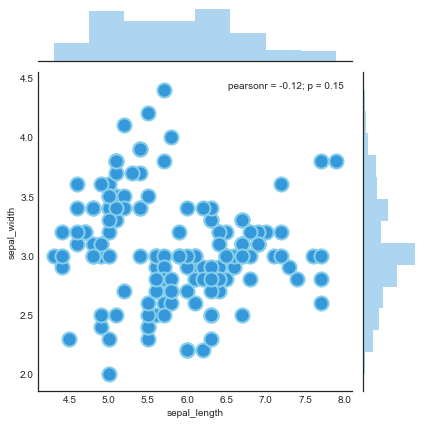

In [6]:
# Then you can pass arguments to each type:
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter', s=200, color="#3498db", edgecolor="skyblue", linewidth=2)

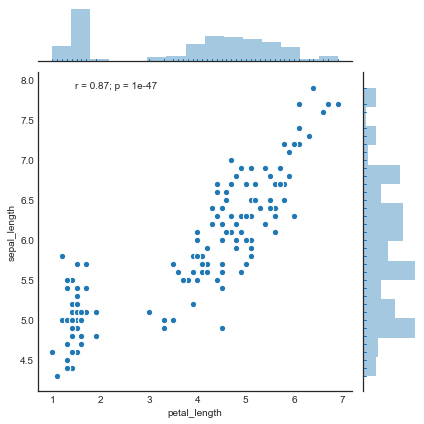

In [7]:
g = sns.jointplot("petal_length", "sepal_length", data=df,
                   marginal_kws=dict(bins=15, rug=True),
                   annot_kws=dict(stat="r"),
                   s=40, edgecolor="w", linewidth=1)

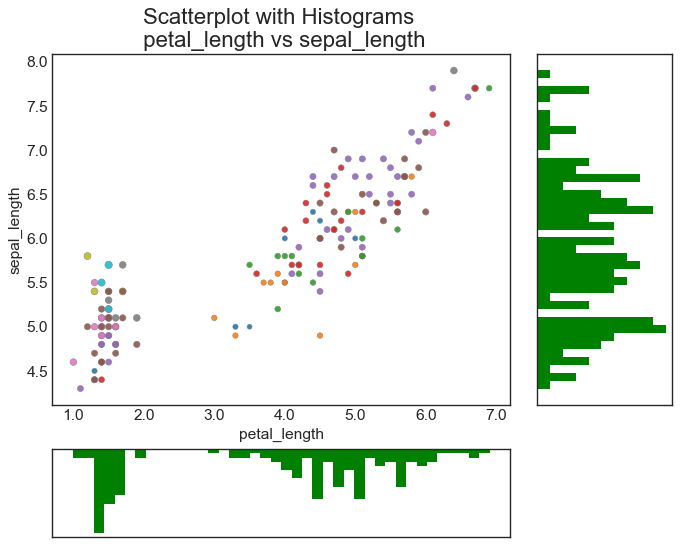

In [8]:
# Create Fig and gridspec
fig = plt.figure(figsize=(10, 8), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('petal_length', 'sepal_length', s=df.sepal_width*10, c=df.sepal_width.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.petal_length, 40, histtype='stepfilled', orientation='vertical', color='g')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.sepal_length, 40, histtype='stepfilled', orientation='horizontal', color='g')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n petal_length vs sepal_length', xlabel='petal_length', ylabel='sepal_length')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

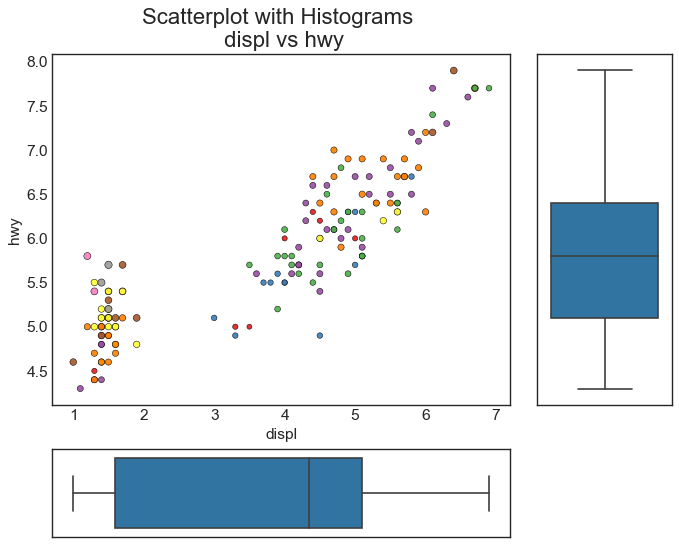

In [9]:
# Create Fig and gridspec
fig = plt.figure(figsize=(10, 8), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('petal_length', 'sepal_length', s=df.sepal_width*10, c=df.sepal_width.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.sepal_length, ax=ax_right, orient="v")
sns.boxplot(df.petal_length, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

## 2. Correllogram

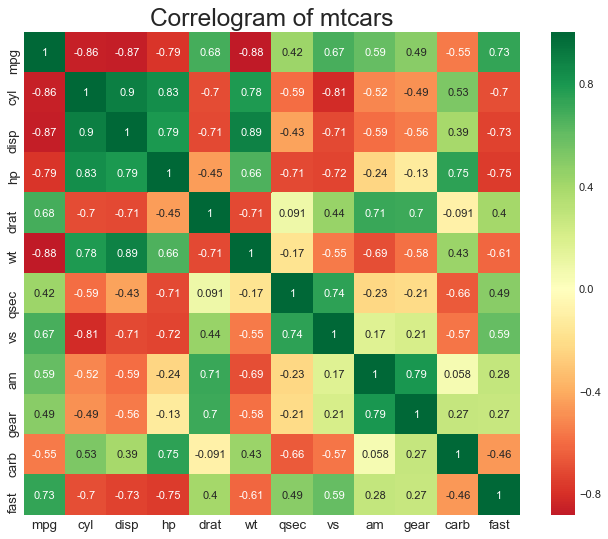

In [10]:
# Import Dataset
df = pd.read_csv("data/mtcars.csv")

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

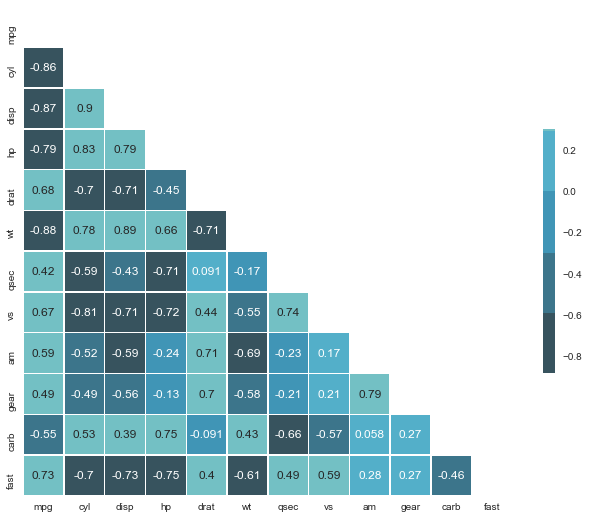

In [11]:
from string import ascii_letters
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
df = pd.read_csv("data/mtcars.csv")
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.color_palette("GnBu_d")
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

## Pairwise Plot for every two variables

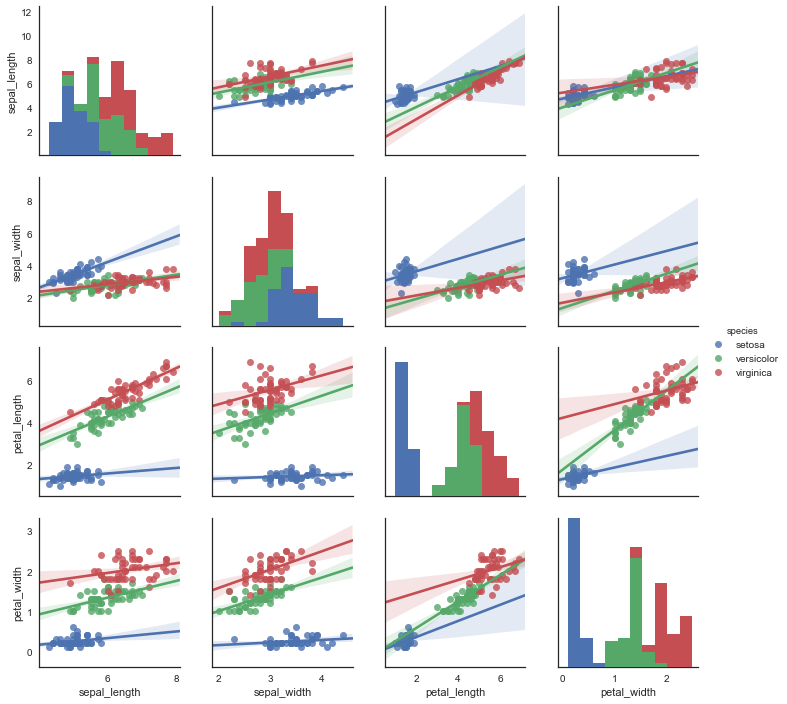

In [12]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

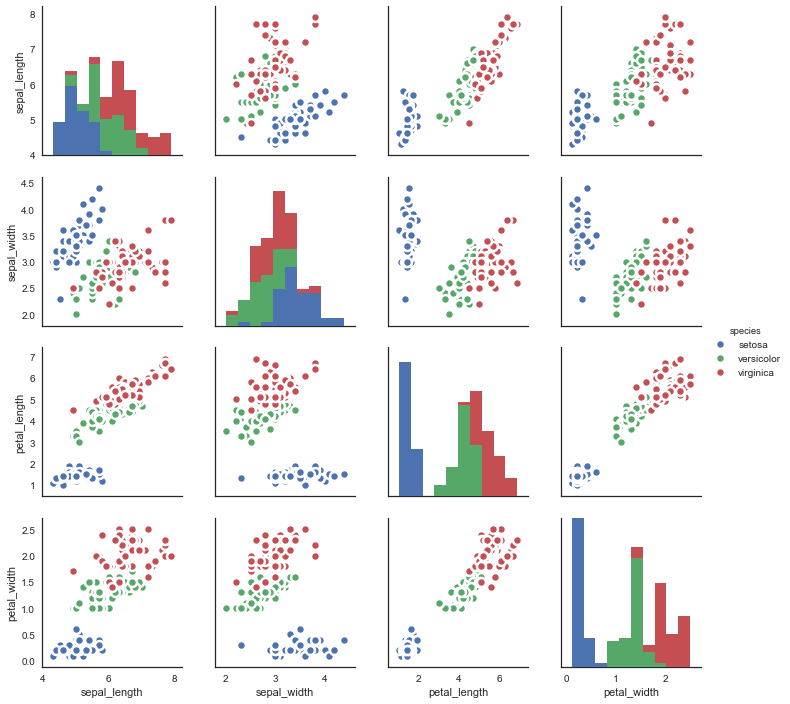

In [13]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

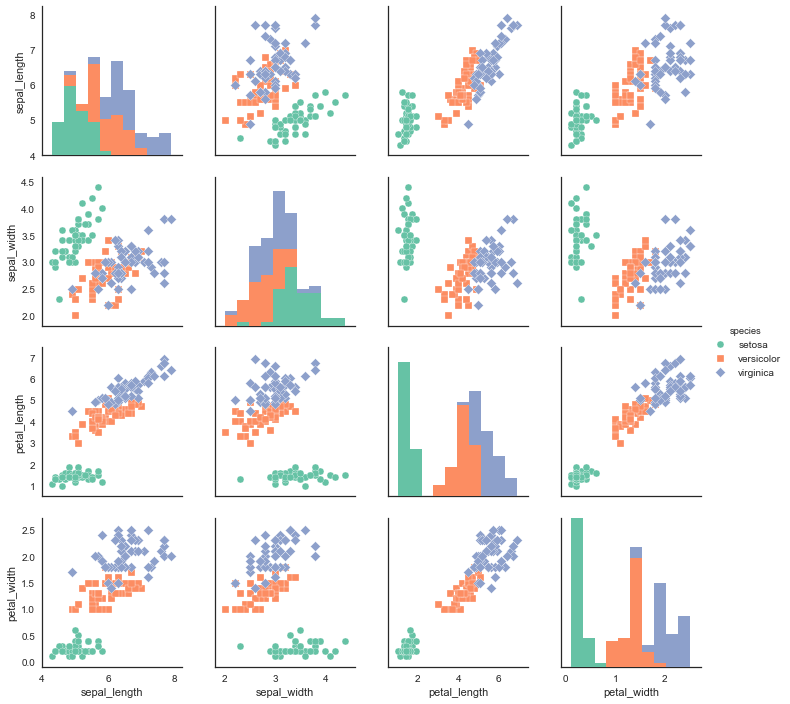

In [14]:
df = sns.load_dataset('iris')
 
# with regression
sns.pairplot(df, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2", diag_kind='hist')
plt.show()